# Project Title: Coca-Cola Stock - Live and Updated

## 1 Problem Statement :
The goal of this project is to analyze historical Coca-Cola stock data and build a machine learning model to predict future stock prices specifically the **'Close'** price.

## objectives
- Perform exploratory data analysis (EDA) to uncover trends and patterns.
- Clean and preprocess the stock data.
- Engineer useful features to improve model accuracy.
- Build and evaluate machine learning models to forecast stock prices.
- Deploy a simple live-updating mechanism using Python and APIs (e.g., yFinance).
- Present insights using visualizations and summary statistics.

## Dataset Overview
The dataset contains historical stock data for Coca-Cola and includes the following columns:

- `Date`  
- `Open`  
- `High`  
- `Low`  
- `Close`  
- `Volume`  
- `Dividends`  
- `Stock Splits`

## 2 Data Collection
In this step, we will:

- Import necessary Python libraries
- Load the dataset into a Pandas DataFrame
- Display the first few rows to understand the structure


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 1.7 MB/s eta 0:00:01
     ------------------------------- ------ 786.4/949.2 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [8]:
import yfinance as yf

ticker = 'KO'

# historical data from Yahoo Finance (2015 to today)
coca_data = yf.download(ticker, start='2015-01-01')

# Reset index to move 'Date' from index to column
coca_data.reset_index(inplace=True)




C:\Users\kande\AppData\Local\Temp\ipykernel_14868\3503867168.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  coca_data = yf.download(ticker, start='2015-01-01')
[*********************100%***********************]  1 of 1 completed


In [9]:
# Display the first ten rows
coca_data.head(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
0,2015-01-02,30.222618,30.409090,29.978772,30.308681,9921100
1,2015-01-05,30.222618,30.817892,30.179588,30.617075,26292600
2,2015-01-06,30.452112,30.796366,30.294331,30.416253,16897500
3,2015-01-07,30.832239,30.918302,30.538189,30.695970,13412300
4,2015-01-08,31.205183,31.248216,30.911133,30.968510,21743600
5,2015-01-09,30.860922,31.241037,30.803548,31.176490,12733500
6,2015-01-12,30.581221,30.982851,30.452125,30.889615,11415800
7,2015-01-13,30.574049,31.011539,30.444954,30.717489,12529500
8,2015-01-14,30.523846,30.552531,30.172419,30.179592,13447600


In [10]:
# Display the last 10 rows
coca_data.tail(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
2651,2025-07-21,70.070000,70.620003,69.930000,70.190002,17811700
2652,2025-07-22,69.660004,70.260002,68.690002,69.449997,22339900
2653,2025-07-23,69.160004,69.739998,68.599998,69.660004,21030000
2654,2025-07-24,69.099998,69.550003,68.989998,69.260002,12511400
2655,2025-07-25,69.169998,69.230003,68.750000,69.129997,12574800
2656,2025-07-28,68.089996,68.900002,68.059998,68.739998,13668800
2657,2025-07-29,69.379997,69.419998,68.150002,68.339996,16223400
2658,2025-07-30,68.750000,69.330002,68.529999,69.110001,10448200
2659,2025-07-31,67.889999,68.650002,67.739998,68.150002,17193400


In [12]:
# Display data information(Rows,Columns,Null values and DataTypes)
coca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2661 non-null   datetime64[ns]
 1   (Close, KO)   2661 non-null   float64       
 2   (High, KO)    2661 non-null   float64       
 3   (Low, KO)     2661 non-null   float64       
 4   (Open, KO)    2661 non-null   float64       
 5   (Volume, KO)  2661 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 124.9 KB


# 3: Data Inspection & Cleaning

1. Inspect the dataset’s structure and types
2. Check for null or missing values
3. Identify duplicate rows (if any)
4. Perform basic data cleaning as needed


### Column Renaming 

The columns currently have a multi-level index format like `('Close', 'KO')`. We'll flatten them so they become simple column names like `Close`.


In [20]:
coca_data.columns = [col[0] if isinstance(col, tuple) else col for col in coca_data.columns]

coca_data.columns


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [21]:
# Check The Data Set Shape
coca_data.shape

(2661, 6)

In [22]:
# Check Data Types And non-null Values Counts
coca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2661 non-null   datetime64[ns]
 1   Close   2661 non-null   float64       
 2   High    2661 non-null   float64       
 3   Low     2661 non-null   float64       
 4   Open    2661 non-null   float64       
 5   Volume  2661 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 124.9 KB


In [23]:
# Check Dataset Missing Values
coca_data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [24]:
# Check Dataset duplicate rows
coca_data.duplicated().sum()

0

In [25]:
# Shows Data Statistics
coca_data.describe()

,Date,Close,High,Low,Open,Volume
count,2661,2661.000000,2661.000000,2661.000000,2661.000000,2.661000e+03
mean,2020-04-15 05:19:49.177000960,45.440905,45.749333,45.118355,45.440502,1.428353e+07
min,2015-01-02 00:00:00,27.698992,28.086044,26.656349,27.698980,2.996300e+06
25%,2017-08-23 00:00:00,34.788219,35.005311,34.580887,34.762311,1.044820e+07
50%,2020-04-16 00:00:00,43.701973,44.072973,43.254002,43.677960,1.296630e+07
75%,2022-12-05 00:00:00,56.153458,56.549726,55.843965,56.151822,1.620220e+07
max,2025-08-01 00:00:00,73.378281,73.854888,72.405196,72.861950,6.784570e+07
std,NaN,11.983941,12.070078,11.877306,11.978237,6.168804e+06


# 4: Exploratory Data Analysis (EDA)

1. Visualize the historical trends of Coca-Cola stock prices
2. Explore trading volume and its relationship to price
3. Analyze moving averages and volatility
4. Identify statistical properties and correlations


In [28]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns


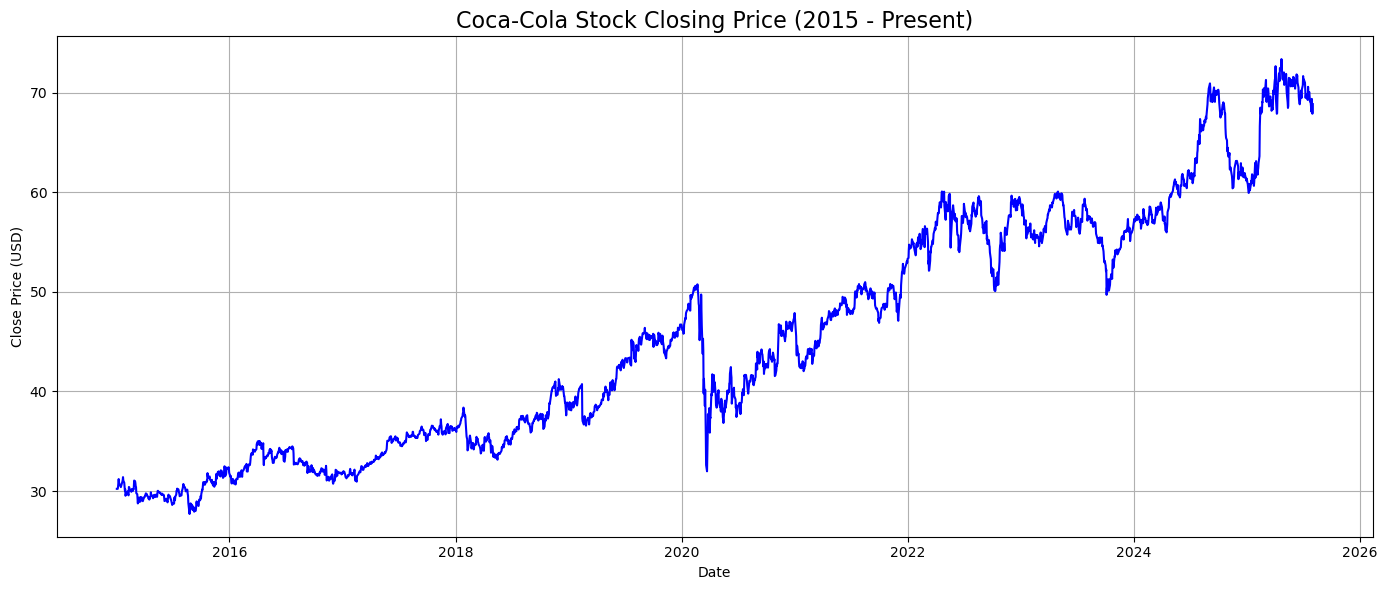

In [30]:
# Plot closing price over time
plt.figure(figsize=(14, 6))
plt.plot(coca_data['Date'], coca_data['Close'], color='blue')
plt.title('Coca-Cola Stock Closing Price (2015 - Present)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

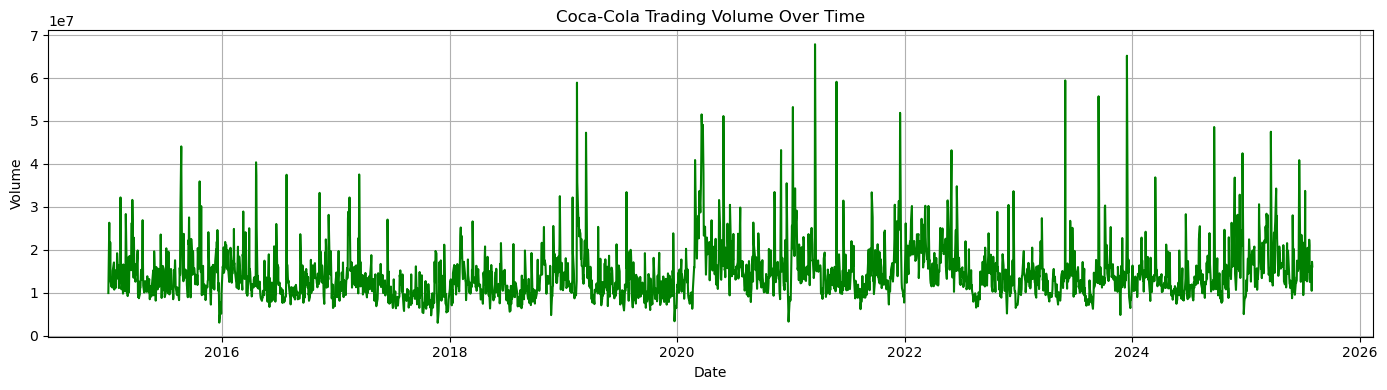

In [32]:
# Volume Over Time
plt.figure(figsize=(14, 4))
plt.plot(coca_data['Date'], coca_data['Volume'], color='green')
plt.title('Coca-Cola Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


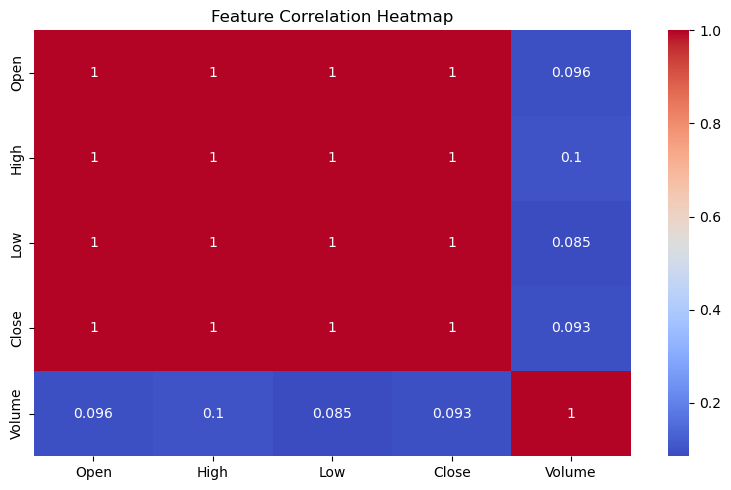

In [33]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(coca_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


In [35]:
# Add simple moving averages
coca_data['SMA_20'] = coca_data['Close'].rolling(window=20).mean()
coca_data['SMA_50'] = coca_data['Close'].rolling(window=50).mean()

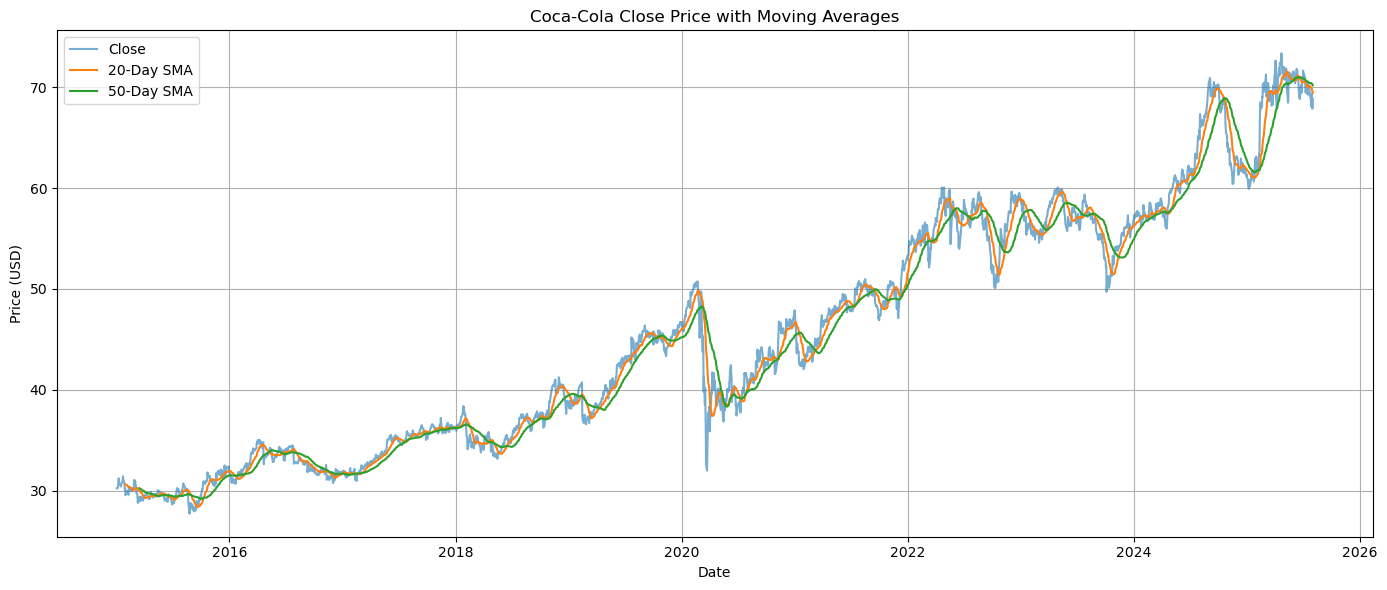

In [36]:

# Plot Close with SMAs
plt.figure(figsize=(14, 6))
plt.plot(coca_data['Date'], coca_data['Close'], label='Close', alpha=0.6)
plt.plot(coca_data['Date'], coca_data['SMA_20'], label='20-Day SMA')
plt.plot(coca_data['Date'], coca_data['SMA_50'], label='50-Day SMA')
plt.title('Coca-Cola Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 5: Feature Engineering

1. **Lag Features** – Previous day’s closing price  
2. **Rolling Statistics** – Moving averages and volatility  
3. **Returns** – Daily percent change  
4. **Date Features** – Month, Day of Week


In [ ]:
# Lag features
coca_data['Close_Lag1'] = coca_data['Close'].shift(1)

In [38]:
coca_data['Close_Lag1']

0             NaN
1       30.222618
2       30.222618
3       30.452112
4       30.832239
          ...    
2656    69.169998
2657    68.089996
2658    69.379997
2659    68.750000
2660    67.889999
Name: Close_Lag1, Length: 2661, dtype: float64

In [40]:
# Daily return
coca_data['Daily_Return'] = coca_data['Close'].pct_change()
coca_data['Daily_Return']

0            NaN
1       0.000000
2       0.007593
3       0.012483
4       0.012096
          ...   
2656   -0.015614
2657    0.018946
2658   -0.009080
2659   -0.012509
2660    0.014288
Name: Daily_Return, Length: 2661, dtype: float64

In [44]:
# Rolling window statistics
coca_data['SMA_10'] = coca_data['Close'].rolling(window=10).mean()
coca_data['SMA_30'] = coca_data['Close'].rolling(window=30).mean()
coca_data['Volatility_10'] = coca_data['Close'].rolling(window=10).std()

In [45]:
# Date-based features
coca_data['Year'] = coca_data['Date'].dt.year
coca_data['Month'] = coca_data['Date'].dt.month
coca_data['Day'] = coca_data['Date'].dt.day
coca_data['DayOfWeek'] = coca_data['Date'].dt.dayofweek

In [46]:
# Droping initial rows with NaN due to rolling/lags
coca_data.dropna(inplace=True)

In [47]:
coca_data[['Close', 'Close_Lag1', 'Daily_Return', 'SMA_10', 'SMA_30', 'Volatility_10']].head()

,Close,Close_Lag1,Daily_Return,SMA_10,SMA_30,Volatility_10
49,29.135584,28.860781,0.009522,29.643276,29.984322,0.715727
50,29.294661,29.135584,0.005460,29.492387,29.966538,0.592359
51,29.359758,29.294661,0.002222,29.380282,29.949969,0.479924
52,28.940329,29.359758,-0.014286,29.233405,29.918223,0.332052
53,29.395912,28.940329,0.015742,29.195201,29.899033,0.280397


#  6: Model Building – Random Forest

We train a **Random Forest Regressor**

1. Use engineered features (`Close_Lag1`, `SMA_20`)
2. Split data into train/test sets
3. Train the Random Forest model
4. Evaluate performance using MAE, RMSE, and R²


In [56]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [57]:
# Selecting Target and features
features = ['Close_Lag1', 'SMA_20', 'SMA_50', 'Daily_Return']
target = 'Close'


In [58]:
X = coca_data[features]
y = coca_data[target]

In [ ]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
X_train

,Close_Lag1,SMA_20,SMA_50,Daily_Return
49,28.860781,29.976338,30.228817,0.009522
50,29.135584,29.941774,30.210258,0.005460
51,29.294661,29.913334,30.193001,0.002222
52,29.359758,29.850295,30.162765,-0.014286
53,28.940329,29.815055,30.134039,0.015742
...,...,...,...,...
2133,57.615513,56.882632,58.248775,0.000327
2134,57.634342,56.943141,58.220844,-0.002124
2135,57.511955,56.999243,58.174519,-0.009330
2136,56.975342,57.037415,58.116911,-0.008262


In [62]:
X_test

,Close_Lag1,SMA_20,SMA_50,Daily_Return
2138,56.692913,57.063576,58.006289,0.005978
2139,57.031830,57.098370,57.958541,0.007428
2140,57.455467,57.131594,57.903813,-0.007701
2141,57.012993,57.131366,57.835891,-0.013210
2142,56.259846,57.102949,57.765101,-0.007530
...,...,...,...,...
2656,69.169998,69.942000,70.420762,-0.015614
2657,68.089996,69.873500,70.386273,0.018946
2658,69.379997,69.727500,70.331439,-0.009080
2659,68.750000,69.576500,70.260796,-0.012509


In [63]:
y_train

49      29.135584
50      29.294661
51      29.359758
52      28.940329
53      29.395912
          ...    
2133    57.634342
2134    57.511955
2135    56.975342
2136    56.504627
2137    56.692913
Name: Close, Length: 2089, dtype: float64

In [64]:
y_test

2138    57.031830
2139    57.455467
2140    57.012993
2141    56.259846
2142    55.836212
          ...    
2656    68.089996
2657    69.379997
2658    68.750000
2659    67.889999
2660    68.860001
Name: Close, Length: 523, dtype: float64